# 의사결정나무_분류

#### - 유방암 결과를 분류하는 의사결정나무 모델을 만들고, predict method를 이용하여 목표변수 범주를 예측하라. 그리고 모델의 정확도와 confusion matrix를 구하라.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

import numpy as np

# train, test를 분할하기 위한 함수
from sklearn.model_selection import train_test_split, GridSearchCV

# confusion matrix
from sklearn.metrics import confusion_matrix

In [3]:
# sklearn.tree 의 DecisionTreeClassifier: 분류의사결정나무
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import plot_tree

In [4]:
# 한글 폰트(맑은 고딕) 적용
matplotlib.rc("font", family = "Malgun Gothic")

## 1. 데이터 구성하기

#### - 데이터 불러오기

In [5]:
df_raw = pd.read_csv("C:/Users/Myung-jin/21aibigdata/bigdata/유방암.CSV", encoding = "euc-kr")
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


#### - 결측치 확인

In [6]:
df_raw.isnull().sum(axis = 0)

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

> 결측치를 확인해보니 존재하지 않았다. 따라서 결측치를 대체해줄 필요도 없다.

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    object 
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

> info()를 통해 각 설명변수의 데이터 타입을 확인해보니 다 연속형(float) 변수이므로 더미변수를 생성할 필요가 없다.

#### - 목표변수 변환 및 데이터 변환

In [15]:
df_raw["diagnosis"] = np.where(df_raw["diagnosis"] == "양성", 1, 0)
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,0,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


> 유방암 진단에 대해 양성은 1, 음성은 0으로 변환해주었다.

In [17]:
df_raw_x = df_raw.drop("diagnosis", axis = 1)
df_raw_y = df_raw["diagnosis"]
df_raw_x.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


#### - 데이터 분할(train : test = 6 : 4)

In [38]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.4, # test 데이터의 비율
                                                                random_state = 1234)  # random state

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (192, 30)
train data Y size : (192,)
test data X size : (128, 30)
test data Y size : (128,)


## 2. 모델 생성

#### - 기본 옵션으로 모델 생성

In [39]:
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 정확도
print("Accucary on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))

# test 데이터 정확도
print("Accucary on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accucary on training set: 1.000
Accucary on test set: 0.883


In [40]:
tree_uncustomized

DecisionTreeClassifier(random_state=1234)

> 의사결정나무 모델을 파라미터 변동 없이 기본 옵션으로 시행했을 때 모델은 train data에서는 100%, test data로는 88.3%의 정확도를 가진다. 모델이 train data에 대해서 **과적합**인 것을 알 수 있다.

### 2-1. 파라미터 조정

#### - min_samples_leaf : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

In [41]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# min_samples_leaf: 잎사귀 수 제한
para_leaf = [n_leaf * 2 for n_leaf in range(1, 11)]

for min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, max_depth=4, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy
df_accuracy_leaf.round(3)


,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,2,0.995,0.875
1,4,0.974,0.891
2,6,0.964,0.875
3,8,0.958,0.898
4,10,0.953,0.914
5,12,0.943,0.906
6,14,0.932,0.898
7,16,0.932,0.852
8,18,0.932,0.852
9,20,0.932,0.852


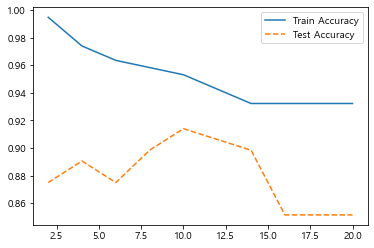

In [42]:
# 정확도를 그래프로 표현
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

> 모델의 정확도는 잎사귀 노드의 최소 자료수가 증가하면 감소하는 것을 확인할 수 있다. train 데이터의 정확도가 덜 감소하면서 test 데이터의 정확도가 높은 (두 데이터의 정확도 차가 작은 구간인) 성능 변화를 고려하여 **잎사귀 노드의 최소 자료수를 10으로 선택**하였다. 하지만 그모델링을 통해 비교를 해보면 좋을 것 같아 train 데이터 정확도와 test 데이터 정확도 간의 간격이 좁은 구역인 **잎사귀 노드의 최소 자료수 = 14인 모델을 통해 비교하고 최종 선택**하려고 한다.

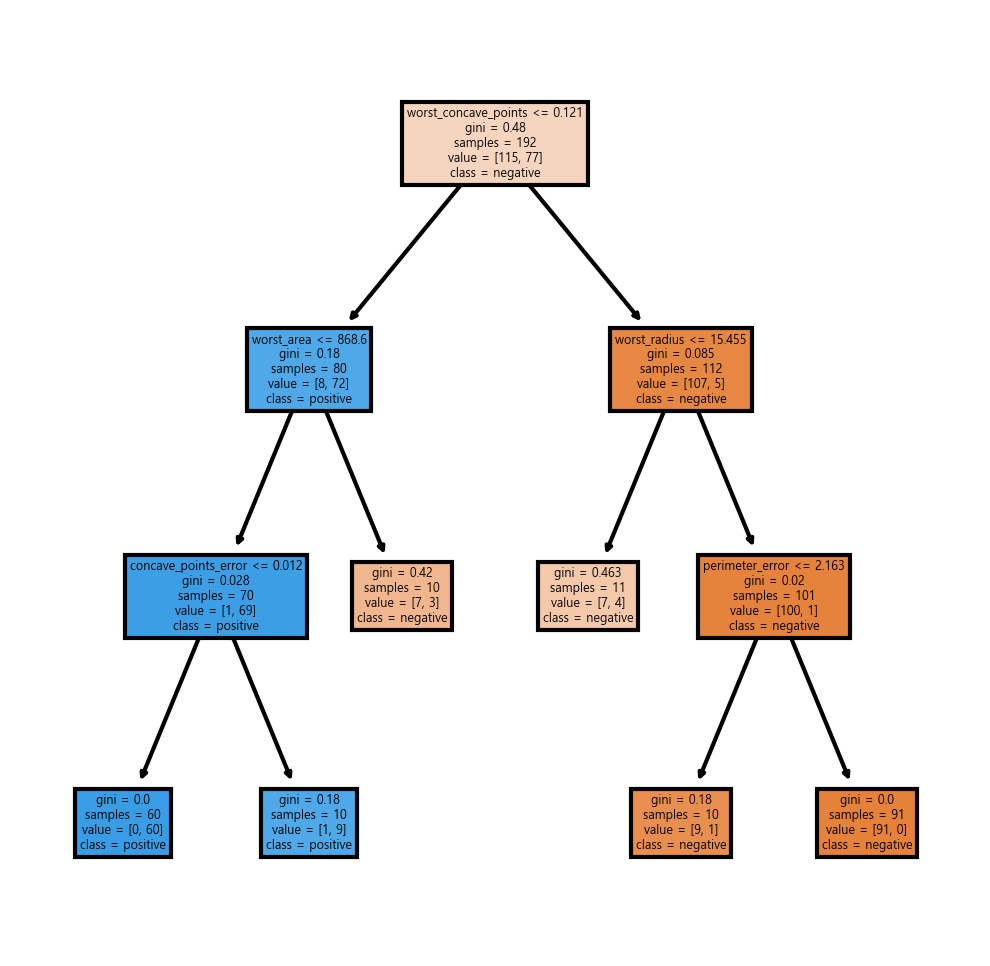

In [43]:
# 잎사귀 노드의 최소 자료 수= 10 모델
tree_low = DecisionTreeClassifier(random_state=1234,  min_samples_leaf= 10 )
tree_low.fit(df_train_x, df_train_y)

v_feature_name = df_train_x.columns

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_low, feature_names = v_feature_name, class_names = ["negative", "positive"], filled = True);

> DT 모델을 통해 해석을 하면 전체적인 train 데이터가 최악의 오목한 점들(worst_concave_points)이 0.121개 이하인가를 기준으로 자식 노드로 분류가 된다. 여기서는 총 192개의 샘플 중 115개가 음성(negative), 77개의 샘플이 양성(positive)이므로 다수결 투표에 따라 음성으로 판단이 되었다. 각 노드는 다수결 투표에 따라 양성, 음성 중 하나로 class가 결정이 된다. 여기에선 **모든 노드가 양성, 음성 중 판단이 되는 것**을 알 수 있다.

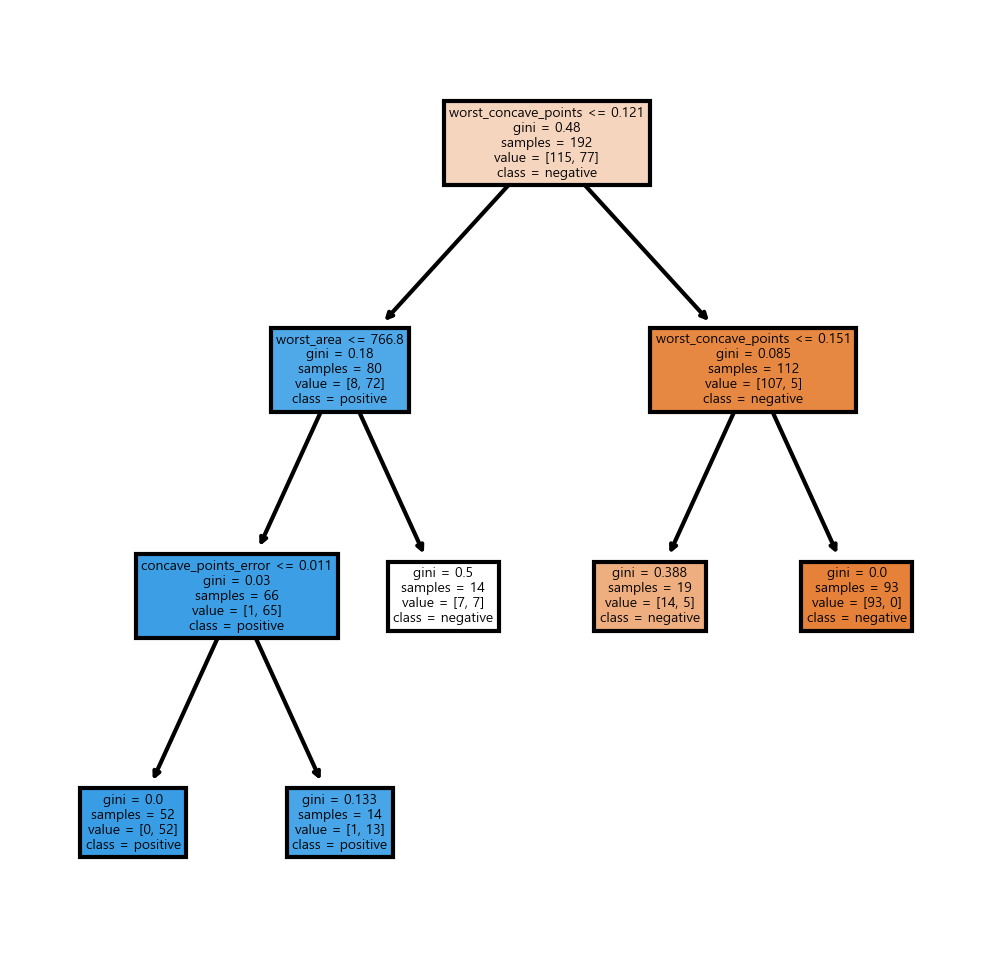

In [44]:
# 잎사귀 노드의 최소 자료 수= 14 모델
tree_low = DecisionTreeClassifier(random_state=1234,  min_samples_leaf= 14 )
tree_low.fit(df_train_x, df_train_y)

v_feature_name = df_train_x.columns

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_low, feature_names = v_feature_name, class_names = ["negative", "positive"], filled = True);

> 이 의사결정트리 모델 역시 해석은 위와 동일하다. 하지만 위와 다른 점이 있다면, 각 노드가 다수결 투표에 의해 양성(positive), 음성(negative) 중 예측판단이 되어야하는데 노드 중 하나가 음성(negative) 표본과 양성(positive) 표본의 갯수가 같아서 다수결 투표로 판단을 내릴 수가 없는 문제가 생긴다. 또 다른 문제는 자료수가 10에서 14로 증가하면서 **과소적합이 일어난 것을 확인**할 수 있다. 따라서 최종적으로 **잎사귀 노드의 최소 자료수를 10으로 선택**하였다.

#### - min_samples_split: 분리 노드의 최소 자료 수 변경에 따른 모델 성능

In [53]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# min_samples_split: 분할하기 위한 노드의 최소 샘플 수 
para_split = [n_split * 10 for n_split in range(6, 13)]

for min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split=min_samples_split, min_samples_leaf = 10, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,60,0.953,0.914
1,70,0.953,0.914
2,80,0.953,0.914
3,90,0.932,0.852
4,100,0.932,0.852
5,110,0.932,0.852
6,120,0.932,0.852


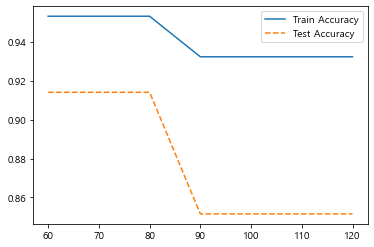

In [54]:
# 정확도를 그래프로 표현
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

> 모델의 정확도는 분리 노드의 최소 자료수가 증가하면서 감소하는 것을 확인할 수 있다. 처음에는 자료수를 [10, 20, 30, ..., 100]으로 주었다가 정확도가 60 이상인 구간에서 변동이 생겨서 구간을 재설정 후 그래프로 나타냈다. train 데이터의 정확도가 덜 감소하면서 test 데이터의 정확도가 높은 (두 데이터의 정확도 차가 작은 구간인) 성능 변화를 고려하여 **분리 노드의 최소 자료수를 80으로 선택**하였다. 80과 90을 기준으로 train 정확도와 test정확도가 변동 없이 일정한데, train 정확도와 test 정확도가 높고 그 간격 차가 작은 80을 최종적으로 선택하였다.

#### - max_depth: 최대 깊이 변경에 따른 정확도 변화

In [55]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for max_depth in para_depth:
    tree = DecisionTreeClassifier(min_samples_split=80, min_samples_leaf = 10, max_depth = max_depth, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.932,0.852
1,2,0.953,0.914
2,3,0.953,0.914
3,4,0.953,0.914
4,5,0.953,0.914
5,6,0.953,0.914
6,7,0.953,0.914
7,8,0.953,0.914
8,9,0.953,0.914
9,10,0.953,0.914


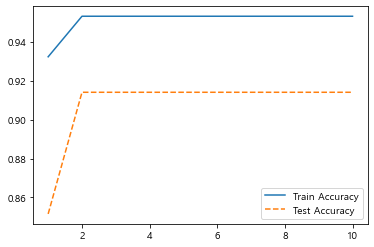

In [56]:
# 정확도를 그래프로 표현
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

> 모델의 정확도는 최대 깊이가 증가하면서 증가하다가 변동이 없는 것을 확인할 수 있다. train 정확도와 test 정확도가 2를 기준으로 일정하므로 **최대 깊이를 2로 선택**하려고 한다. 하지만 2부터 쭉 정확도가 일치하기 때문에 **최대 깊이가 증가하면 어떻게 다를지 모델을 만들어서 비교**를 통해 결정을 하고자 한다.

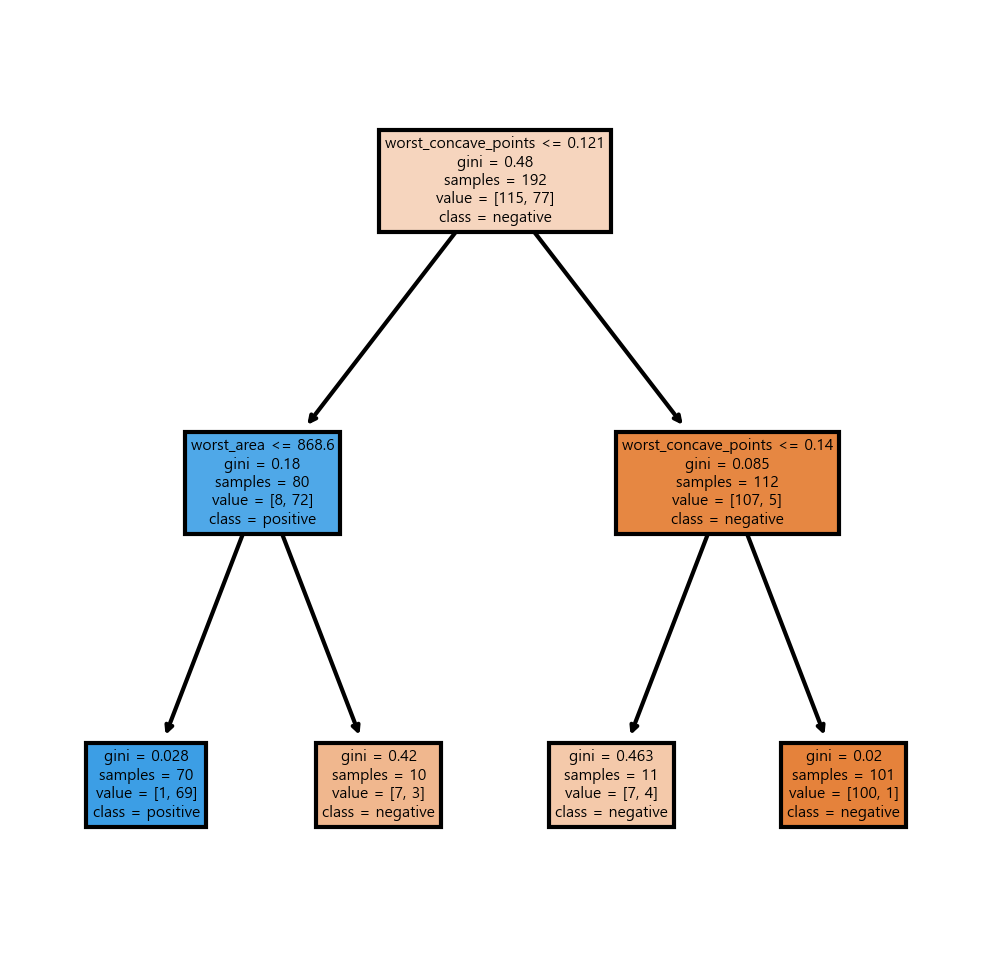

In [57]:
v_feature_name = df_train_x.columns

# 최대 깊이 = 2 모델
tree_graph = DecisionTreeClassifier(random_state = 1234, min_samples_split=80, min_samples_leaf = 10, max_depth = 2)
tree_graph.fit(df_train_x, df_train_y)
v_feature_name = df_train_x.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_graph, feature_names = v_feature_name, class_names = ["negative", "positive"], filled = True);

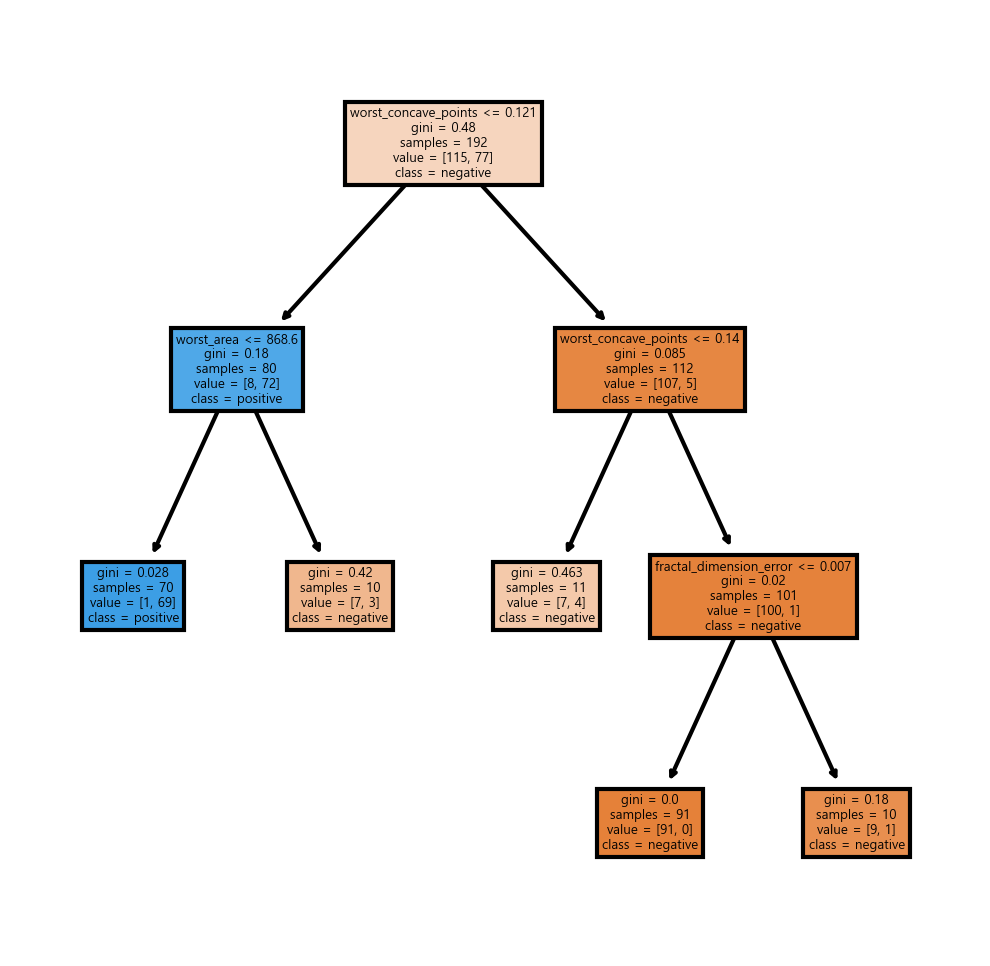

In [58]:
v_feature_name = df_train_x.columns

# 최대 깊이 = 4 모델
tree_graph = DecisionTreeClassifier(random_state = 1234, min_samples_split=80, min_samples_leaf = 10, max_depth = 4)
tree_graph.fit(df_train_x, df_train_y)
v_feature_name = df_train_x.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_graph, feature_names = v_feature_name, class_names = ["negative", "positive"], filled = True);

> max_depth가 2에서 4로 커지면서 max_depth를 4로 지정하여 모델링한 것의 잎사귀 노드를 보면 sample 수가 91개인데 91개가 negative라서 다수결 투표 없이 negative로 판단된다. 제일 오른쪽의 잎사귀 노드 또한 거의 편향된 데이터만 가지고 있다. 따라서 **depth가 4일 때 과대 적합이라고 판단**하였다. 그래서 최종적으로 **max depth는 2를 선택**하였다.

## 3. 최종 모델 선정

#### - 최종 모델

In [59]:
tree_final = DecisionTreeClassifier(max_depth = 2, min_samples_split=80, min_samples_leaf = 10, random_state = 1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=10, min_samples_split=80,
                       random_state=1234)

#### - 최종 모델 시각화

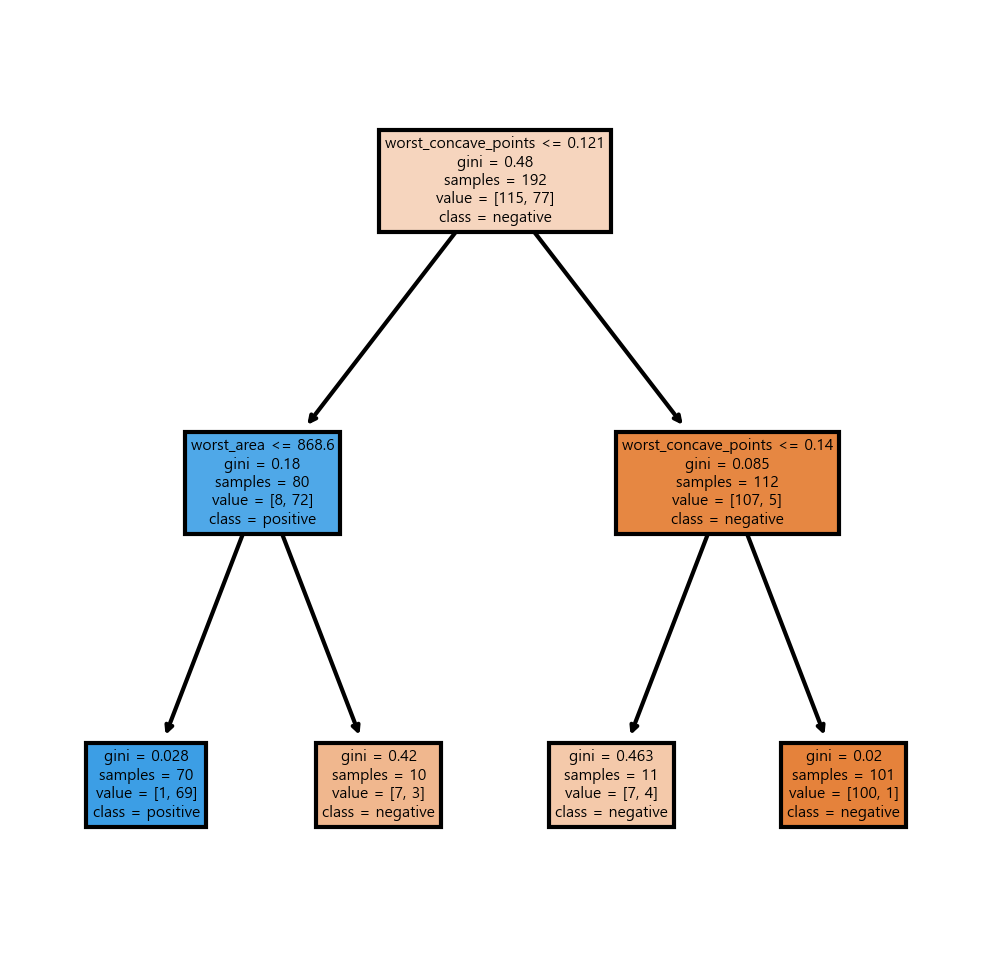

In [61]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_final, feature_names = v_feature_name, class_names = ["negative", "positive"], filled = True);

> 의사결정나무를 모델링하는데 영향을 크게 준, 즉 유방암 판단 모델링에 영향을 끼치는 설명변수는 최악의 오목한 점들(worst_concave_points), 최악의 영역(worst_area)인 것을 알 수 있다. 다른 기준(설명변수)들은 가지치기하면서 gini 지수가 상대적으로 높아서 즉, 순수도가 낮아서, 기준 적용시 다양한 모델을 같은 성질로 분류하기가 더 힘들어서 다른 기준(worst_concave_points, worst_area 외의 설명변수)들이 배제된 것 같다. 이 모델이 괜찮은 모델인지 주관적 판단이 어렵기에 정확도와 confusion matrix를 통해 판단을 해보고자 한다. 

## 4. 최종 모델 평가

In [72]:
# 평가
y_pred = tree_final.predict(df_test_x)

print("목표변수 y 범주 예측(y_pred) :", y_pred)
print()
print("Train Data Accuracy: {0:.3f}\n".format(tree_final.score(df_train_x, df_train_y)))
print("Test Data Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

목표변수 y 범주 예측(y_pred) : [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1]

Train Data Accuracy: 0.953

Test Data Accuracy: 0.914

Confusion matrix: 
[[94  3]
 [ 8 23]]


> predict method를 통해 y(목표변수)의 범주를 예측해보면, 0과 1로 이루어져 있으므로 **목표변수의 범주는 0, 1**이다. 분류를 통해 범주형 레이블 0과 1로 예측하였다는 뜻이다. 이 말은 곧 **유방암을 판정하는 30개의 증상(설명변수)에 따라 유방암이 음성인지, 양성인지 여부를 예측한다**는 것이다.  
  
> 최종 생성된 모델 test data로 정확도 검증을 실행해본 결과 **정확도는 0.914**이다. **confusion matrix는 [[94 3][8 3]]** 행렬이라는 것을 확인했다. confusion matrix을 통해 정확도를 다시 한번 검증해보면 $(94 + 23)/(94 + 3 + 8 + 23) = 117/ 128 = 0.914$로 제대로 나오는 것을 알 수 있다. 그리고 아무 파라미터를 넣지 않았던 기본 모델과의 비교를 위해 이 모델의 train 데이터 정확도도 구해보았다. 애초에 모델을 train data 학습을 통해 생성하였기에 train 데이터의 정확도는 의미가 없을 수 있으나 파라미터 변경 전후 비교를 위해 정확도를 구해보았다.    

> - Accucary on training set: 1.000 -> 0.953  
> - Accucary on test set: 0.883 -> 0.914  

> training 데이터의 정확도가 소폭 감소하였고, test 데이터의 정확도가 88.3%에서 91.4%로 크게 향상되었다. 따라서 이 의사결정나무 모델링을 통해 과적합을 어느 정도 방지하였고, 또한 모델의 성능이 향상되었다는 것을 알 수 있다.

## 5. 결론 도출

#### - 설명변수 중요도 확인

In [73]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
27,worst_concave_points,0.896
23,worst_area,0.104
0,mean_radius,0.000
1,mean_texture,0.000
28,worst_symmetry,0.000
26,worst_concavity,0.000
25,worst_compactness,0.000
24,worst_smoothness,0.000
22,worst_perimeter,0.000
21,worst_texture,0.000


Text(0, 0.5, '설명변수')

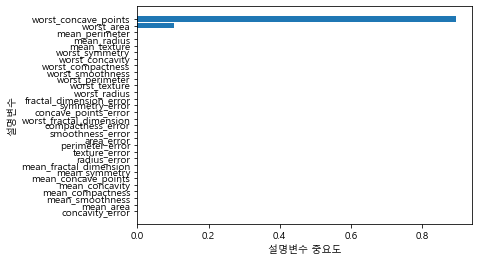

In [74]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림. 
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")


> 이 의사결정나무를 모델링하는데(유방암 진단 모델링) 영향을 주는 중요 설명변수는 최악의 오목한 점들(worst_concave_points)과 최악인 영역넓이(worst_area) 순이다. 즉 **유방암 진단을 하는데 이 두 요인이 영향이 크다**는 것을 알 수 있다.  
  
> 단, 그렇다고 해서 나머지 설명변수들의 중요도가 0이라는 것은 이 설명변수들이 중요하지 않다는 뜻이 아니고, 이 의사결정나무 모델링에 영향을 주지 않는다는 것이다. 하지만 다른 모델을 구축하거나 train 데이터가 달라진다면 중요도가 변경될 수 있다. 

#### GridSearchCV를 이용한 최적 parameter 찾기

In [75]:
estimator = DecisionTreeClassifier(random_state = 1234)
param_grid = {"max_depth": para_depth,
              "min_samples_split": para_split,
              "min_samples_leaf": para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=60,
                       random_state=1234)

best parameter: 
{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 60}

best score: 
0.932


> GridSearchCV를 통해 최적의 파라미터를 찾아보았더니 최대 깊이는 3, 잎사귀 노드의 최소 자료 수는 2, 분리노드의 최소 자료수는 60인 것으로 나왔다. 이 파라미터로 모델링을 할 경우 정확도는 93.2%이다.   
  
> GridSearchCV는 데이터를 fit할 때, train/test 데이터를 분할하여 사용하는 것이 아니라 Cross-validation을 통해 fit하기 때문에 위의 방식과 다르게 구축되었다. 이 모델은 93.2%의 정확성을 가지고 유방암을 진단하므로 본인의 의사결정나무의 정확도(91.4%)보다 높다. 그러나 **파라미터를 설정하지 않은 기본 모델에 비해 성능이 향상되었다는 점에서 직접 생성한 모델과 GridSearchCV를 통한 모델 둘 다 유방암을 진단하는 의료적인 기기에 사용이 가능한 모델이라고 판단**한다. 하지만 이 모델에서 **영향을 주는 설명변수가 두 개라는 점은 효율성은 올릴지 몰라도 많은 변칙적인 case를 대변하지 못하므로 모델을 다시 구축할 필요도 있다**고 생각한다.
  
> 추가적으로 의사결정나무는 자료가 적으면 그만큼 불안정이 발생할 수 있는데 이 상황에는 cross-validation 방법이 안정적이기 때문에 **데이터가 적은 환경이라면 GridSearchCV를 통해 구한 최적의 파라미터로 구한 모델을 사용하는 것을 안정성 측면에서 추천**한다.